# Prediction of Price
     1. Actual price of NEVs and conventional vehicles in the future market by manufacture
     
     2. The cost/save of driving in the future

In [22]:
import pandas as pd
import matplotlib.pylab as plt
import plotly.graph_objs as go
import plotly.express as px
import matplotlib
import numpy as np
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots

In [23]:
SAVE = '../Processed_Data/Save_money.csv'
Price = '../Processed_Data/Vehicle_Dataset.csv'

In [24]:
df_save = pd.read_csv(SAVE)
df_price = pd.read_csv(Price)

### Actual price of NEVs and conventional vehicles in the future market by manufacture

In [25]:
df_price

,Unnamed: 0,Maker,Genmodel,Year,Price,Gas_emission,Fuel_type,Engine_size
0,0,Abarth,124 spider,2016,29365,148,Petrol,1368
1,1,Abarth,124 spider,2016,31365,153,Petrol,1368
2,2,Abarth,124 spider,2017,29365,148,Petrol,1368
3,3,Abarth,124 spider,2017,31365,153,Petrol,1368
4,4,Abarth,124 spider,2017,26665,148,Petrol,1368
...,...,...,...,...,...,...,...,...
335557,335557,Volvo,Xc40,2018,35250,163,Petrol,1969
335558,335558,Volvo,Xc40,2018,36750,166,Petrol,1969
335559,335559,Volvo,Xc40,2018,29200,144,Petrol,1477
335560,335560,Volvo,Xc40,2018,33350,161,Petrol,1969


In [26]:
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Diesel','Not_NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Petrol','Not_NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Other','NE')
df_price['Fuel_type'] = df_price['Fuel_type'].replace('Electric Diesel REX','NE')

In [27]:
df_price.drop(columns=['Unnamed: 0','Maker','Genmodel','Gas_emission','Engine_size'])

,Year,Price,Fuel_type
0,2016,29365,Not_NE
1,2016,31365,Not_NE
2,2017,29365,Not_NE
3,2017,31365,Not_NE
4,2017,26665,Not_NE
...,...,...,...
335557,2018,35250,Not_NE
335558,2018,36750,Not_NE
335559,2018,29200,Not_NE
335560,2018,33350,Not_NE


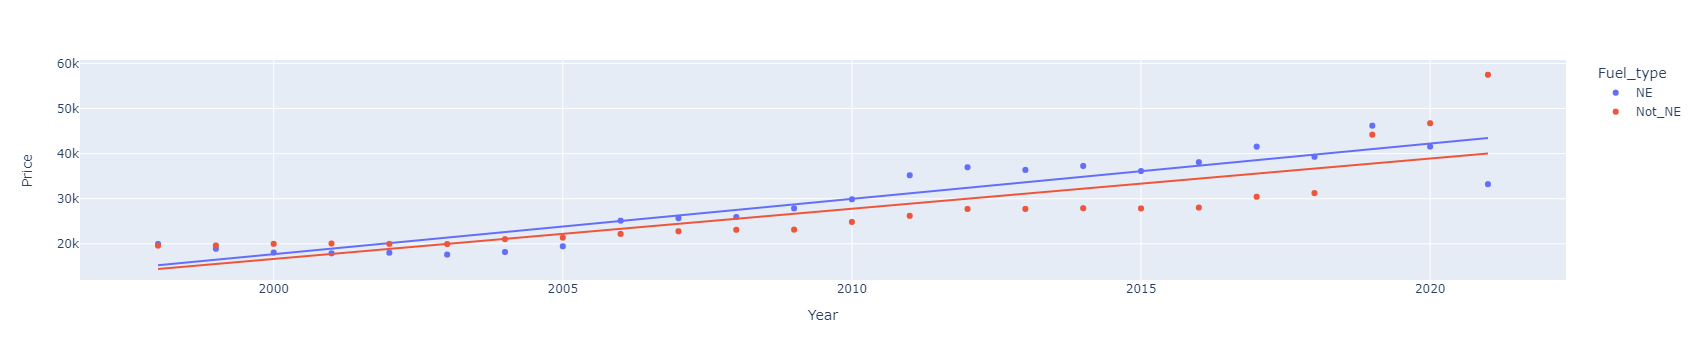

In [28]:
group = df_price.groupby(['Year','Fuel_type']).agg({'Price': 'mean'})
group = group.reset_index()
fig = px.scatter(group, x="Year", y="Price", color='Fuel_type',trendline='ols')
fig.show()

In [29]:
group

,Year,Fuel_type,Price
0,1998,NE,19970.746269
1,1998,Not_NE,19600.636836
2,1999,NE,18905.921053
3,1999,Not_NE,19633.790715
4,2000,NE,18072.250000
5,2000,Not_NE,19990.851553
6,2001,NE,17889.867220
7,2001,Not_NE,20066.693938
8,2002,NE,18027.271676
9,2002,Not_NE,19983.673577


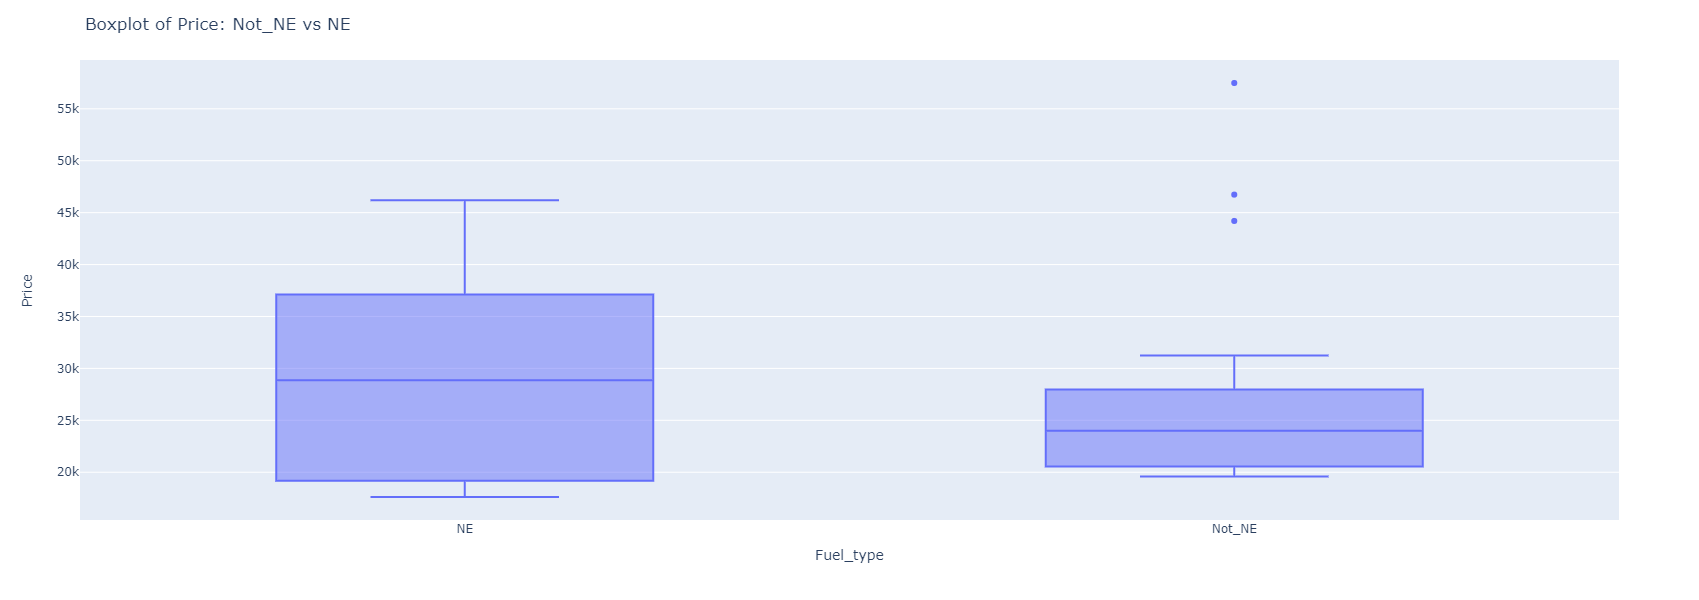

In [30]:
fig = px.box(group, x="Fuel_type", y="Price")
fig.layout.update(
    width=1000,
    height=600,
    title_text = 'Boxplot of Price: Not_NE vs NE')
fig.show()

### The cost/save of driving in the future

In [31]:
df_save = df_save.drop(columns=['Unnamed: 0'])

In [32]:
df_save.head()

,Year,cost_of_gas,cost_of_EV,cost_of_PHEV,cost_of_FCV,Avg_NE
0,2022.0,1859.905660,698.125000,1318.604651,1300.0,1105.576550
1,2021.0,2095.423729,695.098039,1492.000000,1320.0,1169.032680
2,2020.0,2076.817793,646.052632,1445.555556,1350.0,1147.202729
3,2019.0,1904.559748,628.571429,1258.333333,1350.0,1078.968254
4,2018.0,1778.682171,618.750000,1213.235294,1250.0,1027.328431


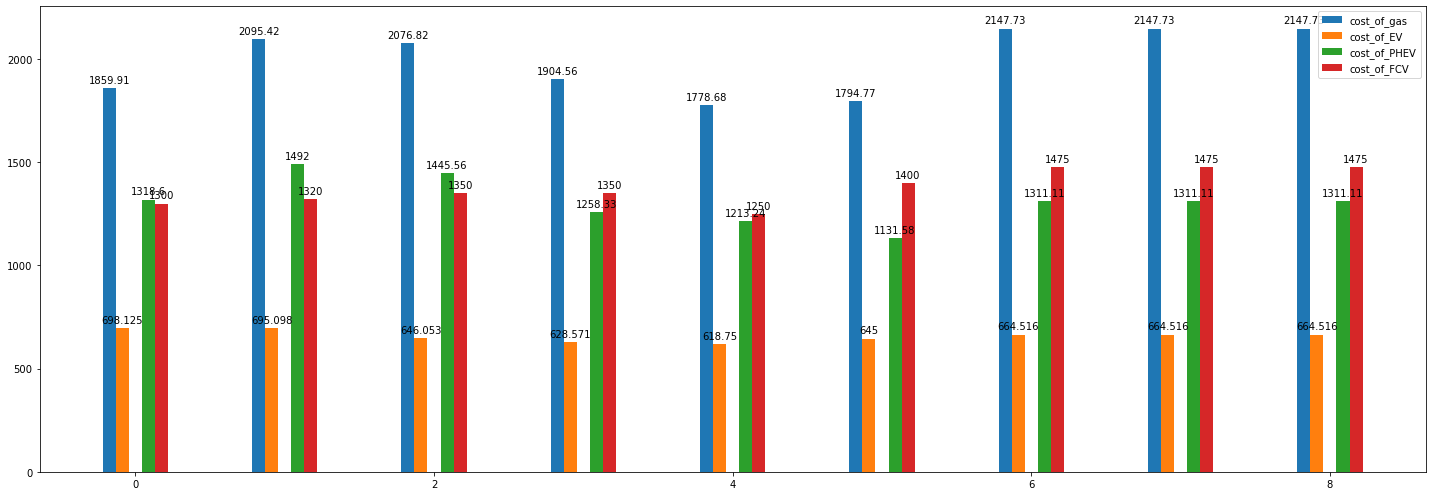

In [33]:
labels =df_save['Year']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,7))
rects1 = ax.bar(x - width/2, df_save['cost_of_gas'], width/4, label='cost_of_gas')
rects2 = ax.bar(x - width/4, df_save['cost_of_EV'], width/4, label='cost_of_EV')
rects3 = ax.bar(x + width/4, df_save['cost_of_PHEV'], width/4, label='cost_of_PHEV')
rects4 = ax.bar(x + width/2, df_save['cost_of_FCV'], width/4, label='cost_of_FCV')
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
fig.tight_layout()

ax.legend()

In [34]:
df_save

,Year,cost_of_gas,cost_of_EV,cost_of_PHEV,cost_of_FCV,Avg_NE
0,2022.0,1859.905660,698.125000,1318.604651,1300.0,1105.576550
1,2021.0,2095.423729,695.098039,1492.000000,1320.0,1169.032680
2,2020.0,2076.817793,646.052632,1445.555556,1350.0,1147.202729
3,2019.0,1904.559748,628.571429,1258.333333,1350.0,1078.968254
4,2018.0,1778.682171,618.750000,1213.235294,1250.0,1027.328431
5,2017.0,1794.774920,645.000000,1131.578947,1400.0,1058.859649
6,2016.0,2147.732894,664.516129,1311.111111,1475.0,1150.209080
7,2015.0,2147.732894,664.516129,1311.111111,1475.0,1150.209080
8,2014.0,2147.732894,664.516129,1311.111111,1475.0,1150.209080


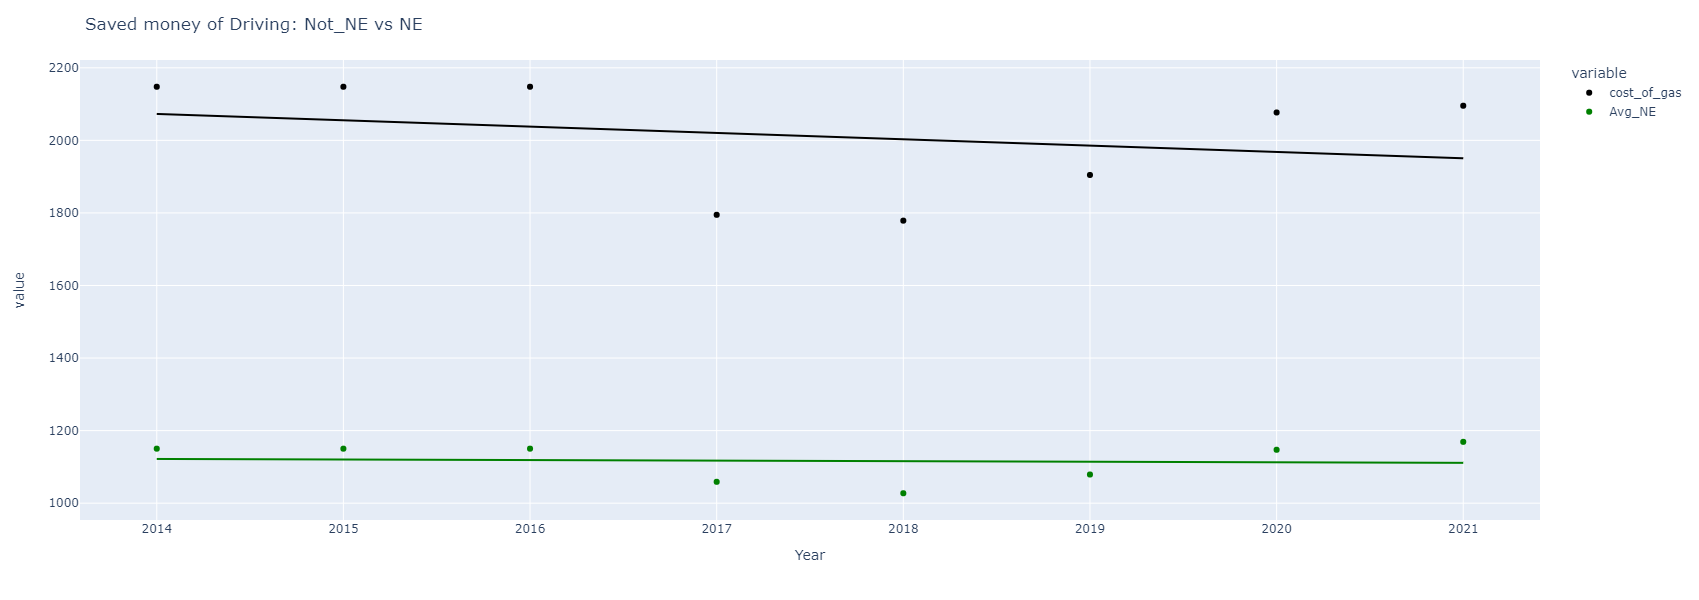

In [35]:
fig = px.scatter(df_save.drop(0), x="Year", y=['cost_of_gas','Avg_NE'],color_discrete_sequence=["black", "green"],trendline='ols')
fig.layout.update(
    width=1000,
    height=600,
    barmode='group',
    title_text = 'Saved money of Driving: Not_NE vs NE')
fig.show()

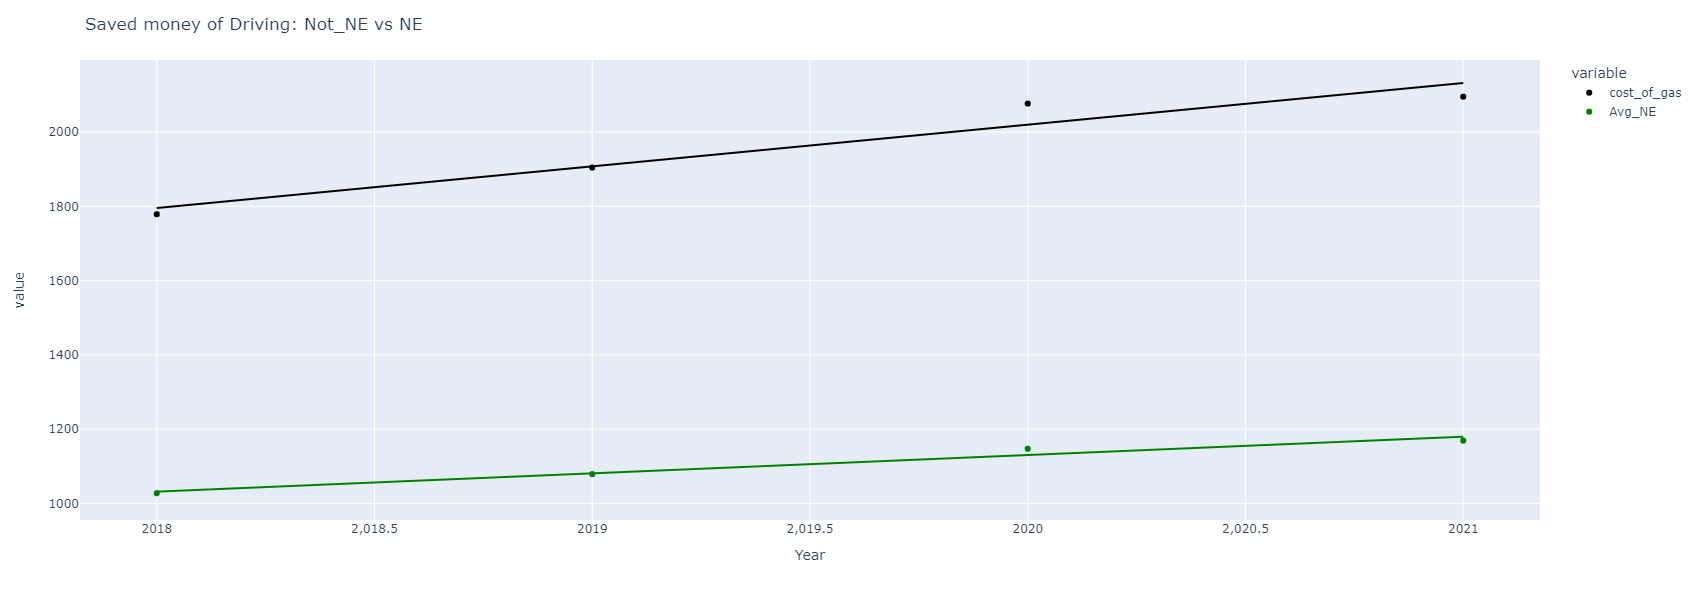

In [36]:
new_save = df_save.loc[~((df_save['Year'] != 2018) & (df_save['Year'] != 2019) & (df_save['Year'] != 2020) & (df_save['Year'] != 2021) ),:]
fig = px.scatter(new_save, x="Year", y=['cost_of_gas','Avg_NE'],color_discrete_sequence=["black", "green"],trendline='ols')
fig.layout.update(
    width=1000,
    height=600,
    barmode='group',
    title_text = 'Saved money of Driving: Not_NE vs NE')
fig.show()

In [37]:
stacked = df_save.drop(0)

In [38]:
group = group.loc[~((group['Year'] < 2014)),:]

In [39]:
NEV = group.loc[~((group['Fuel_type'] != 'NE') ),:]
NEV

,Year,Fuel_type,Price
32,2014,NE,37266.251701
34,2015,NE,36130.680359
36,2016,NE,38099.428152
38,2017,NE,41550.735814
40,2018,NE,39292.561941
42,2019,NE,46202.142857
44,2020,NE,41555.625000
46,2021,NE,33226.666667


In [40]:
Not_NEV = group.loc[~((group['Fuel_type'] != 'Not_NE') ),:]
Not_NEV

,Year,Fuel_type,Price
33,2014,Not_NE,27895.246257
35,2015,Not_NE,27847.337637
37,2016,Not_NE,28033.217977
39,2017,Not_NE,30434.448172
41,2018,Not_NE,31247.538882
43,2019,Not_NE,44199.509615
45,2020,Not_NE,46735.361446
47,2021,Not_NE,57484.409091


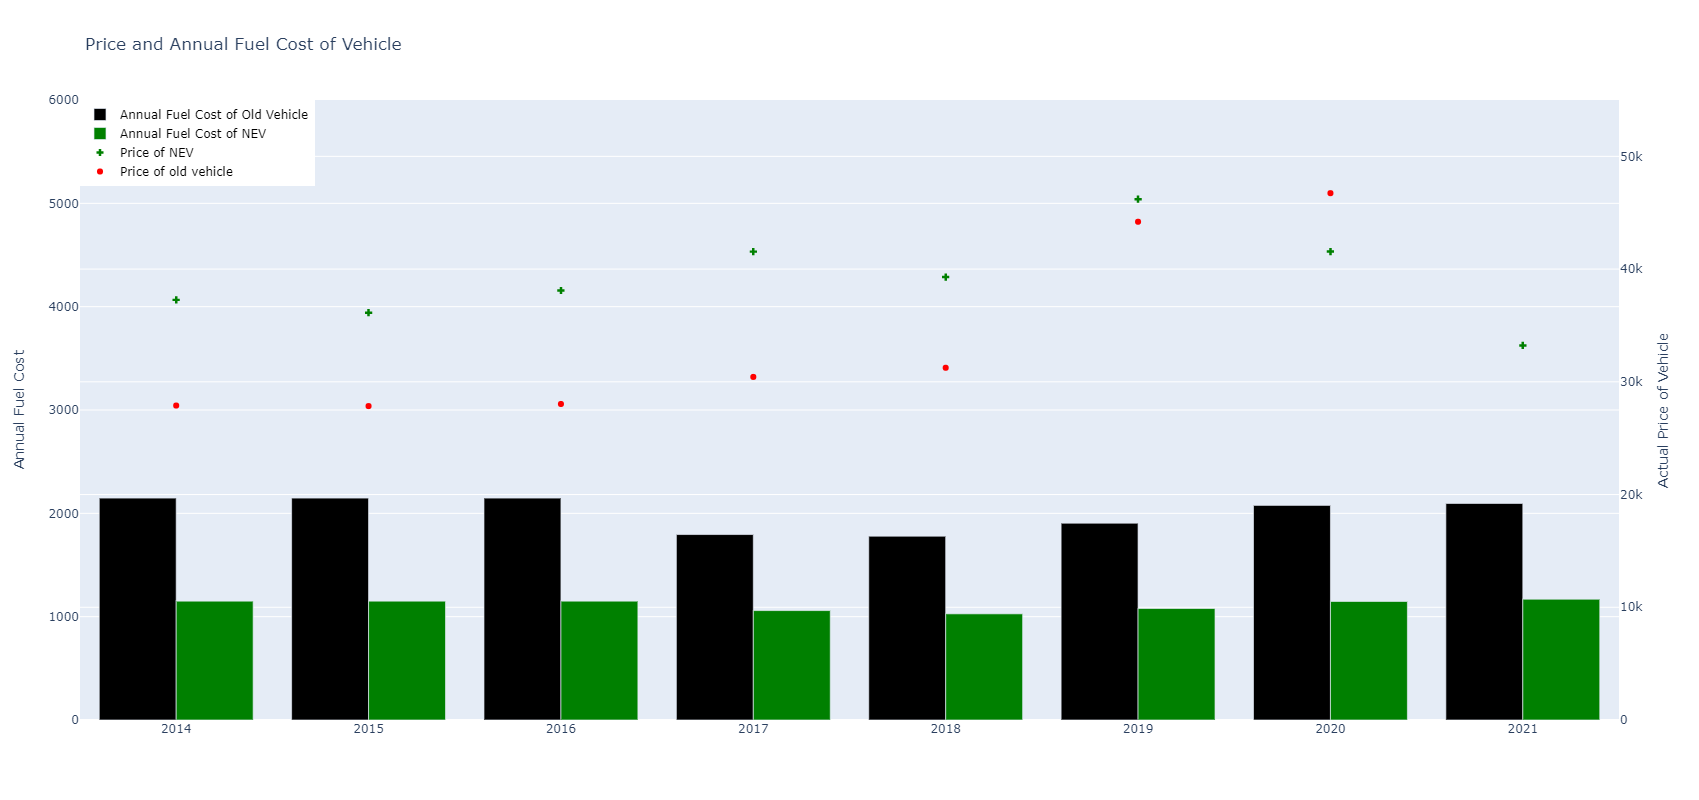

In [41]:
trace0 = go.Bar(x=stacked["Year"], 
                y=stacked['cost_of_gas'], 
                name="Annual Fuel Cost of Old Vehicle", 
                marker_color='black')
trace1 = go.Bar(x=stacked["Year"], 
                y=stacked['Avg_NE'], 
                name="Annual Fuel Cost of NEV",
                marker_color='green')
trace2 = go.Scatter(x=NEV["Year"], 
                    y=NEV["Price"],
                    name="Price of NEV",
                    mode = "markers", marker_color='green',
                    marker_symbol=3,yaxis="y2")
trace3 = go.Scatter(x=Not_NEV["Year"], 
                    y=Not_NEV["Price"], 
                    name="Price of old vehicle",
                    mode = "markers", 
                    marker_color='red',
                    yaxis="y2")
data1 = [trace0, trace1, trace2, trace3]
layout = go.Layout(title="Price and Annual Fuel Cost of Vehicle",
                   yaxis=dict(title="Annual Fuel Cost", range=[0, 6000]),
                   yaxis2=dict(title="Actual Price of Vehicle", overlaying='y', side="right",range=[0, 55000]),
                   legend=dict(x=0, y=1, font=dict(size=12, color="black")))
fig = go.Figure(data=data1, layout=layout)
fig.update_layout(
    width=1600,
    height=800
)
fig.show()

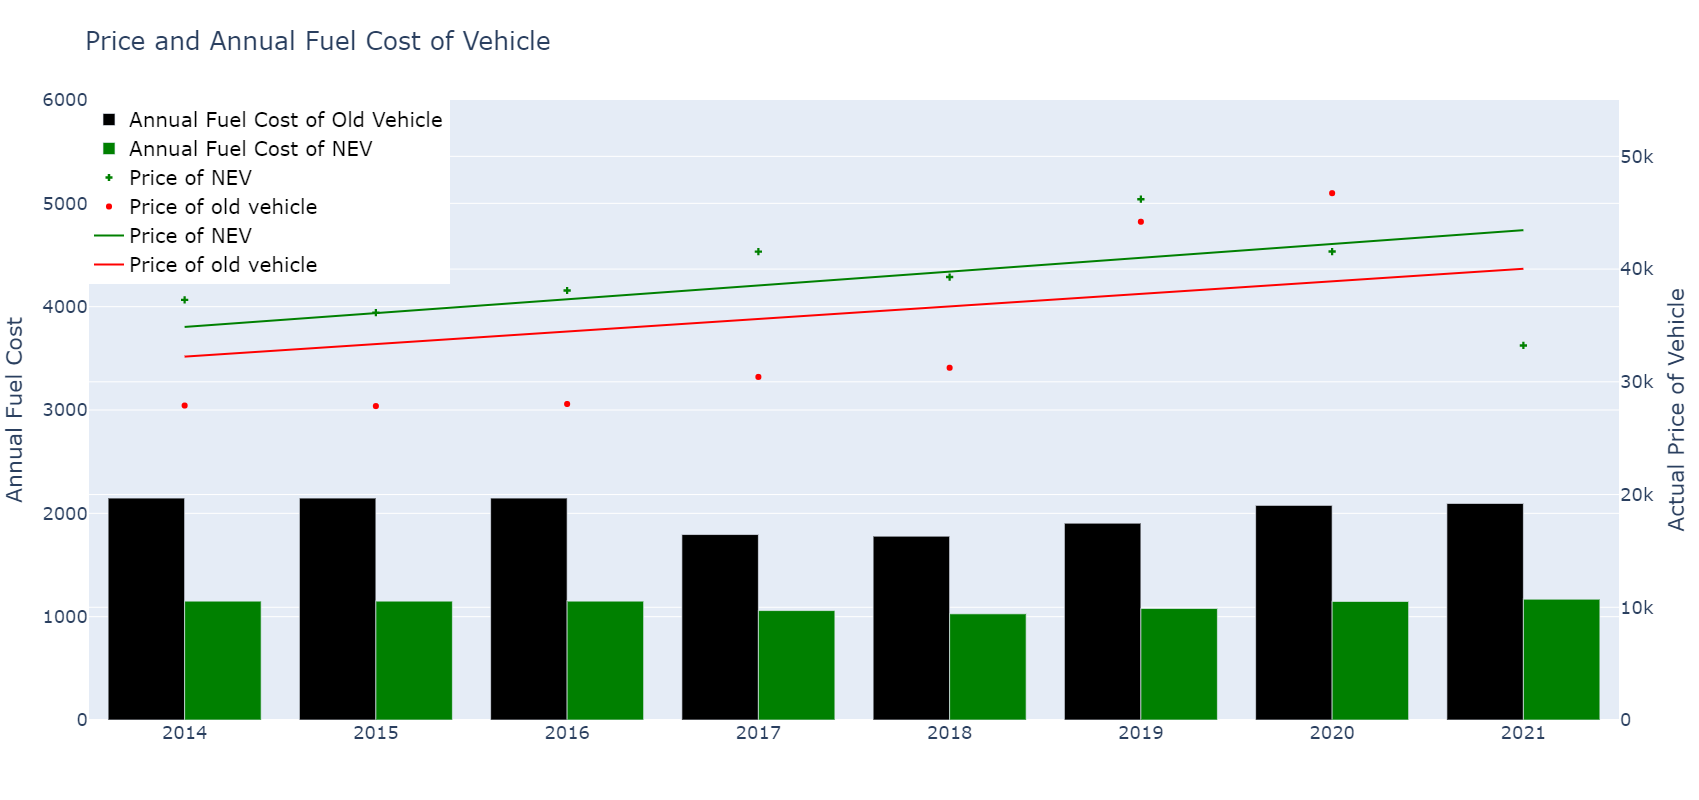

In [43]:
trace0 = go.Bar(x=stacked["Year"], 
                y=stacked['cost_of_gas'], 
                name="Annual Fuel Cost of Old Vehicle", 
                marker_color='black')
trace1 = go.Bar(x=stacked["Year"], 
                y=stacked['Avg_NE'], 
                name="Annual Fuel Cost of NEV",
                marker_color='green')
trace2 = go.Scatter(x=NEV["Year"], 
                    y=NEV["Price"],
                    name="Price of NEV",
                    mode = "markers", marker_color='green',
                    marker_symbol=3,yaxis="y2")
trace3 = go.Scatter(x=Not_NEV["Year"], 
                    y=Not_NEV["Price"], 
                    name="Price of old vehicle",
                    mode = "markers", 
                    marker_color='red',
                    yaxis="y2")
trace4 = go.Scatter(x=NEV["Year"], 
                    y=1226.35*NEV["Year"]+ -2.435e+06, 
                    mode = "lines",name="Price of NEV", 
                    marker_color = "green",
                    yaxis="y2")
trace5 = go.Scatter(x=Not_NEV["Year"], 
                    y=1113.26*Not_NEV["Year"]+ -2.20987e+06, 
                    mode = "lines",
                    name="Price of old vehicle", 
                    marker_color = "red",yaxis="y2")
data1 = [trace0, trace1, trace2, trace3,trace4,trace5]
layout = go.Layout(title="Price and Annual Fuel Cost of Vehicle",
                   font_size=18,
                   yaxis=dict(title="Annual Fuel Cost", range=[0, 6000]),
                   yaxis2=dict(title="Actual Price of Vehicle", overlaying='y', side="right",range=[0, 55000]),
                   legend=dict(x=0, y=1, font=dict(size=20, color="black")))
fig = go.Figure(data=data1, layout=layout)
fig.update_layout(
    width=1600,
    height=800
)
fig.show()